In [5]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [9]:
key = os.environ.get('AZURE_SEARCH_KEY', 'de6ba714117747ae9c909e4ded114f43')

In [10]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [11]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [12]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']


In [13]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

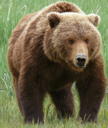

In [14]:
im = Image.open(dest)
im.to_thumb(128,128)

In [15]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [16]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [17]:
fns = get_image_files(path)
fns

(#390) [Path('bears/grizzly/968801ad-c4fb-4e14-8fa0-a2d513ec5724.jpg'),Path('bears/grizzly/bc05ead1-053a-4115-b578-0f3dc0a4c22e.jpg'),Path('bears/grizzly/e8fa1c93-5c8a-4e5f-84a8-c45565cdb4fe.jpg'),Path('bears/grizzly/d778b953-befd-49d8-8df6-fa49765ee2cb.jpg'),Path('bears/grizzly/6c4882b7-5b44-402c-9a79-f5b50d4decf4.jpg'),Path('bears/grizzly/23eed169-6933-4156-86f3-8c2581fd3962.jpg'),Path('bears/grizzly/86662c5d-86c5-428c-8f0b-40d8cceb097c.jpg'),Path('bears/grizzly/2fc64c48-2c4d-4fad-891d-b3b6cc8b528a.jpg'),Path('bears/grizzly/037b7933-e8fa-40d5-bffd-a46310f2ea2b.jpg'),Path('bears/grizzly/5034c905-7092-40da-bedc-677c6229e529.jpg')...]

In [18]:
failed = verify_images(fns)
failed

(#15) [Path('bears/grizzly/35257775-a633-450f-a68d-f7473597e96b.JPG'),Path('bears/grizzly/1d29cf2b-3624-44d5-b89e-9036a044bd73.jpg'),Path('bears/grizzly/2e672443-1286-4c98-9411-7d0cbf2f3e1a.jpg'),Path('bears/grizzly/cd14e372-1d3f-4803-b664-c3c595854176.jpg'),Path('bears/grizzly/ab96d39b-d69a-491e-b0d7-2d6a4ce01e48.jpg'),Path('bears/black/e50f7289-039e-4f93-b996-1467d4d839e8.jpg'),Path('bears/black/2f008032-5ecc-4af3-8422-a132c849f74c.jpg'),Path('bears/black/6bcad28b-6f2a-4f80-ae18-a0451160e913.jpg'),Path('bears/teddy/45c0b0ff-2fc2-4cec-8da9-9cd94b76ca38.JPG'),Path('bears/teddy/97e68fb2-12f9-4670-9fec-7ef065685181.JPG')...]

In [19]:
failed.map(Path.unlink);


In [20]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [21]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = bears.dataloaders(path)


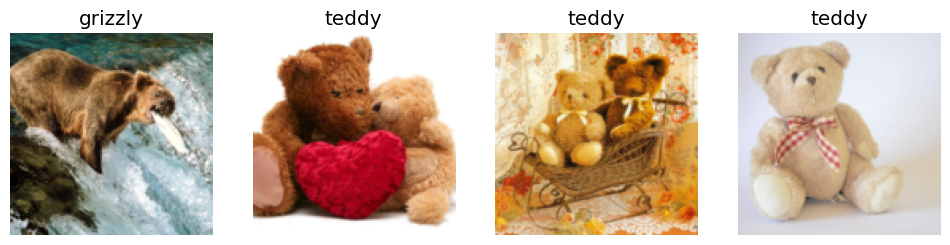

In [23]:
dls.valid.show_batch(max_n=4, nrows=1)
